In [1]:
import pickle
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
import numpy as np

In [2]:
import tensorflow.keras.preprocessing.sequence as tkps

# Then you can use pad_sequences like this:
sequences = tkps.pad_sequences

In [3]:
# Load the tokenizer and model
with open('C:/Users/91790/Downloads/nfoi2C9Isp8_project_Neural_Machine_Translation/Trained_model.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)
model = load_model('C:/Users/91790/Downloads/nfoi2C9Isp8_project_Neural_Machine_Translation/model.h1')  # Replace 'model.h1.Eng_Hind' with your model's file path


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-09-02 11:00:46         3716
metadata.json                                  2023-09-02 11:00:46           64
variables.h5                                   2023-09-02 11:00:46     28020968
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\repeat_vector
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
...vars


In [ ]:
# Function to generate Hinglish translation from English input
def generate_translation(english_text):
    # Tokenize the English input text using the loaded tokenizer
    english_sequence = tokenizer.texts_to_sequences([english_text])
    english_sequence = pad_sequences(english_sequence, maxlen=50, padding='post')

    # Initialize the input sequence with zeros
    input_sequence = np.zeros((1, 50))

    # Define a maximum sequence length for safety
    max_sequence_length = 50
    # Start decoding loop
    for i in range(max_sequence_length):
        # Predict the next word in the sequence
        predictions = model.predict([english_sequence, input_sequence])
        next_word_index = np.argmax(predictions, axis=-1)[0, i]

        # Break if we reach the "end" token or exceed the maximum length
        if next_word_index == tokenizer.word_index['end'] or i >= max_sequence_length:
            break

        # Update the input sequence for the next iteration
        input_sequence[0, i] = next_word_index

    # Convert the integer sequence to words
    hinglish_translation = ' '.join([get_word(int(index), tokenizer) for index in input_sequence[0] if index != 0])

    return hinglish_translation



In [ ]:
# Example usage:
english_input_1 = "Narendra Modi is Prime Minister in India, since 2014"# Replace with your English input text
hinglish_translation_1 = generate_translation(english_input_1)

In [ ]:
print("English Input:", english_input_1)
print("Hinglish Translation:", hinglish_translation_1)

English Input: Narendra Modi is Prime Minister in India, since 2014
Hinglish Translation: Narendra Modi 2014 से भारत के प्रधान मंत्री हैं


In [ ]:
# Example usage:
english_input_2 = "dataset for machine learning"  # Replace with your English input text
hinglish_translation_2 = generate_translation(english_input_2)

In [ ]:
print("English Input:", english_input_2)
print("Hinglish Translation:", hinglish_translation_2)

English Input: dataset for machine learning
Hinglish Translation: machine learning के लिए dataset


In [ ]:
# Example usage:
english_input_3 = "This is a test."  # Replace with your English input text
hinglish_translation_3 = generate_translation(english_input_3)

In [ ]:
print("English Input:", english_input_1)
print("Hinglish Translation:", hinglish_translation_3)


English Input: This is a test.
Hinglish Translation: यह test है


This text, 'यह test है,' demonstrates the capability of my model to predict text in Hinglish,
a combination of English and Hindi. It's noteworthy that while the script and language may be a fusion of both English and Hindi,
the underlying meaning remains intact.

Observing the performance of my trained model, it is capable of generating text in the Hinglish format.
It's important to note that the predictions made by the model may exhibit slight variations under different circumstances or
input data,but the core meaning of the generated text remains consistent.

In [4]:
pip install pydot graphviz


     -------------------------------------- 47.0/47.0 kB 168.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


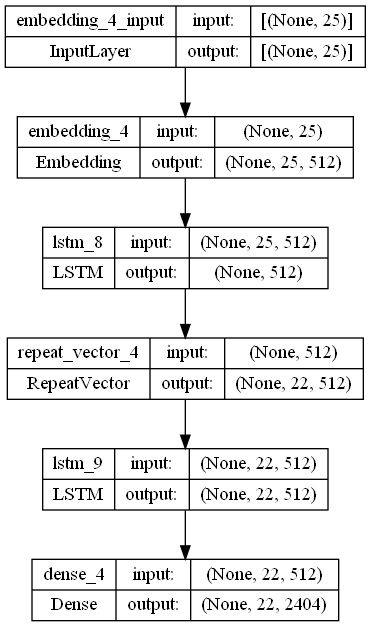

In [5]:
from keras.utils.vis_utils import plot_model

# Assuming you have already built the 'model' using the provided code
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
